In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression, PoissonRegressor, ridge_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, confusion_matrix, accuracy_score, classification_report, roc_auc_score, mean_squared_error, r2_score, mean_absolute_error
import sklearn.preprocessing as pre
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
sns.set(style="darkgrid")

In [3]:
covid = pd.read_csv(r"C:\Users\Obiageli\Desktop\python\worldometer_data.csv")

In [4]:
covid

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,Montserrat,North America,4.992000e+03,13,NaN,1.0,NaN,10.0,NaN,2.0,NaN,2604.0,200.0,61.0,12220.0,NaN
205,Caribbean Netherlands,North America,2.624700e+04,13,NaN,NaN,NaN,7.0,NaN,6.0,NaN,495.0,NaN,424.0,16154.0,NaN
206,Falkland Islands,South America,3.489000e+03,13,NaN,NaN,NaN,13.0,NaN,0.0,NaN,3726.0,NaN,1816.0,520493.0,NaN
207,Vatican City,Europe,8.010000e+02,12,NaN,NaN,NaN,12.0,NaN,0.0,NaN,14981.0,NaN,NaN,NaN,Europe


In [5]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country/Region    209 non-null    object 
 1   Continent         208 non-null    object 
 2   Population        208 non-null    float64
 3   TotalCases        209 non-null    int64  
 4   NewCases          4 non-null      float64
 5   TotalDeaths       188 non-null    float64
 6   NewDeaths         3 non-null      float64
 7   TotalRecovered    205 non-null    float64
 8   NewRecovered      3 non-null      float64
 9   ActiveCases       205 non-null    float64
 10  Serious,Critical  122 non-null    float64
 11  Tot Cases/1M pop  208 non-null    float64
 12  Deaths/1M pop     187 non-null    float64
 13  TotalTests        191 non-null    float64
 14  Tests/1M pop      191 non-null    float64
 15  WHO Region        184 non-null    object 
dtypes: float64(12), int64(1), object(3)
memory u

In [6]:
covid.head()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa


In [7]:
covid.describe()

,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop
count,2.080000e+02,2.090000e+02,4.000000,188.000000,3.000000,2.050000e+02,3.000000,2.050000e+02,122.000000,208.000000,187.000000,1.910000e+02,191.000000
mean,3.041549e+07,9.171850e+04,1980.500000,3792.590426,300.000000,5.887898e+04,1706.000000,2.766433e+04,534.393443,3196.024038,98.681176,1.402405e+06,83959.366492
std,1.047661e+08,4.325867e+05,3129.611424,15487.184877,451.199512,2.566984e+05,2154.779803,1.746327e+05,2047.518613,5191.986457,174.956862,5.553367e+06,152730.591240
min,8.010000e+02,1.000000e+01,20.000000,1.000000,1.000000,7.000000e+00,42.000000,0.000000e+00,1.000000,3.000000,0.080000,6.100000e+01,4.000000
25%,9.663140e+05,7.120000e+02,27.500000,22.000000,40.500000,3.340000e+02,489.000000,8.600000e+01,3.250000,282.000000,6.000000,2.575200e+04,8956.500000
50%,7.041972e+06,4.491000e+03,656.000000,113.000000,80.000000,2.178000e+03,936.000000,8.990000e+02,27.500000,1015.000000,29.000000,1.357020e+05,32585.000000
75%,2.575614e+07,3.689600e+04,2609.000000,786.000000,449.500000,2.055300e+04,2538.000000,7.124000e+03,160.250000,3841.750000,98.000000,7.576960e+05,92154.500000
max,1.381345e+09,5.032179e+06,6590.000000,162804.000000,819.000000,2.576668e+06,4140.000000,2.292707e+06,18296.000000,39922.000000,1238.000000,6.313960e+07,995282.000000


In [8]:
covid.isnull().sum()

Country/Region        0
Continent             1
Population            1
TotalCases            0
NewCases            205
TotalDeaths          21
NewDeaths           206
TotalRecovered        4
NewRecovered        206
ActiveCases           4
Serious,Critical     87
Tot Cases/1M pop      1
Deaths/1M pop        22
TotalTests           18
Tests/1M pop         18
WHO Region           25
dtype: int64

In [9]:
covid.fillna(0, inplace= True)
covid = covid[covid['Continent'] != '0']

## Daily Growth Rate of Cases

In [10]:

covid["Daily Growth Rate of Cases (%)"] = (covid["NewCases"] / (covid["TotalCases"] - covid["NewCases"])) * 100

In [11]:
covid['Daily Growth Rate of Cases (%)'].value_counts().reset_index()

,Daily Growth Rate of Cases (%),count
0,0.000000,205
1,1.444859,1
2,1.505738,1
3,0.137941,1
4,3.232759,1


In [12]:
covid['Daily Growth Rate of Cases (%)'].sum()

6.321295293212662

## Daily Growth Rate of Deaths

In [13]:
covid["Daily Growth Rate of Deaths (%)"] = (covid["NewDeaths"] / (covid["TotalDeaths"] - covid["NewDeaths"])) * 100

In [14]:
covid['Daily Growth Rate of Deaths (%)'].value_counts().reset_index()

,Daily Growth Rate of Deaths (%),count
0,0.000000,185
1,1.647954,1
2,2.363368,1
3,0.331126,1


In [15]:
covid['Daily Growth Rate of Deaths (%)'].sum()

4.34244726691382

## Cases per Population

In [16]:

covid["Cases per 1M Population"] = (covid["TotalCases"] / covid["Population"])

In [17]:
covid['Cases per 1M Population'].value_counts().reset_index()

,Cases per 1M Population,count
0,0.015194,1
1,0.000292,1
2,0.000314,1
3,0.000045,1
4,0.000379,1
...,...,...
204,0.002469,1
205,0.002621,1
206,0.004086,1
207,0.001874,1


In [18]:
covid['Cases per 1M Population'].sum()

inf

In [19]:
covid['DeathRate'] = covid['TotalDeaths'] / covid['TotalCases']
covid['RecoveryRate'] = covid['TotalRecovered'] / covid['TotalCases']

In [20]:
covid

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,...,Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region,Daily Growth Rate of Cases (%),Daily Growth Rate of Deaths (%),Cases per 1M Population,DeathRate,RecoveryRate
0,USA,North America,3.311981e+08,5032179,0.0,162804.0,0.0,2576668.0,0.0,2292707.0,...,15194.0,492.0,63139605.0,190640.0,Americas,0.0,0.0,0.015194,0.032353,0.512038
1,Brazil,South America,2.127107e+08,2917562,0.0,98644.0,0.0,2047660.0,0.0,771258.0,...,13716.0,464.0,13206188.0,62085.0,Americas,0.0,0.0,0.013716,0.033810,0.701839
2,India,Asia,1.381345e+09,2025409,0.0,41638.0,0.0,1377384.0,0.0,606387.0,...,1466.0,30.0,22149351.0,16035.0,South-EastAsia,0.0,0.0,0.001466,0.020558,0.680052
3,Russia,Europe,1.459409e+08,871894,0.0,14606.0,0.0,676357.0,0.0,180931.0,...,5974.0,100.0,29716907.0,203623.0,Europe,0.0,0.0,0.005974,0.016752,0.775733
4,South Africa,Africa,5.938157e+07,538184,0.0,9604.0,0.0,387316.0,0.0,141264.0,...,9063.0,162.0,3149807.0,53044.0,Africa,0.0,0.0,0.009063,0.017845,0.719672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,Montserrat,North America,4.992000e+03,13,0.0,1.0,0.0,10.0,0.0,2.0,...,2604.0,200.0,61.0,12220.0,0,0.0,0.0,0.002604,0.076923,0.769231
205,Caribbean Netherlands,North America,2.624700e+04,13,0.0,0.0,0.0,7.0,0.0,6.0,...,495.0,0.0,424.0,16154.0,0,0.0,NaN,0.000495,0.000000,0.538462
206,Falkland Islands,South America,3.489000e+03,13,0.0,0.0,0.0,13.0,0.0,0.0,...,3726.0,0.0,1816.0,520493.0,0,0.0,NaN,0.003726,0.000000,1.000000
207,Vatican City,Europe,8.010000e+02,12,0.0,0.0,0.0,12.0,0.0,0.0,...,14981.0,0.0,0.0,0.0,Europe,0.0,NaN,0.014981,0.000000,1.000000


# EDA analysis

> ### Total death and survived by continent

In [21]:
Total_Mortality_by_cont = covid.groupby(["Continent"])[['TotalDeaths', 'TotalRecovered']].sum().reset_index()

Total_Mortality_by_cont
Total_Mortality_by_cont.drop(0, inplace = True)

In [22]:
Total_Mortality_by_cont

,Continent,TotalDeaths,TotalRecovered
1,Africa,22114.0,693620.0
2,Asia,100627.0,3508170.0
3,Australia/Oceania,281.0,12620.0
4,Europe,205232.0,1587302.0
5,North America,229855.0,3151678.0
6,South America,154885.0,3116150.0


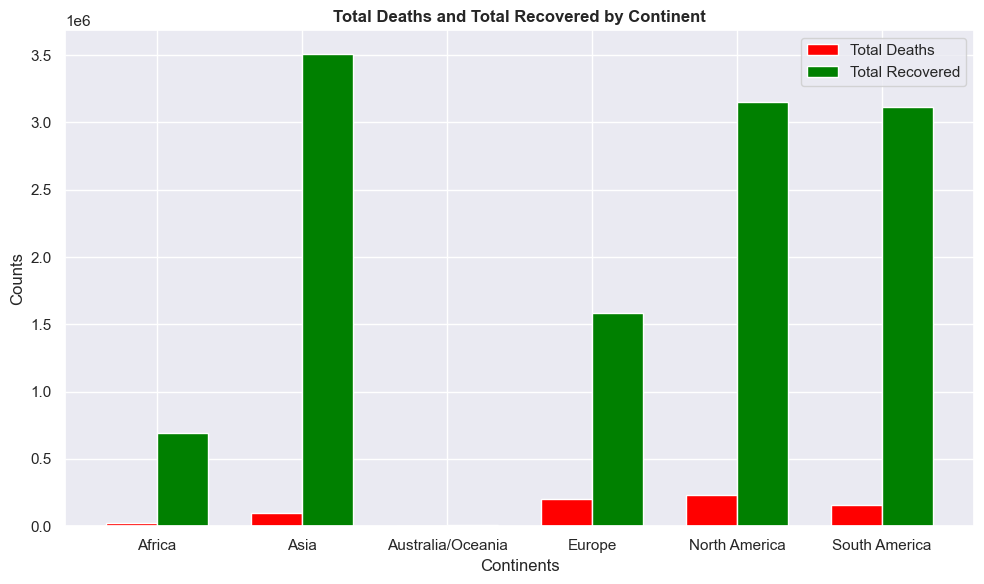

In [23]:


# Data
x = np.arange(len(Total_Mortality_by_cont['Continent']))
width = 0.35  

plt.figure(figsize=(10,6),facecolor= "white")

plt.bar(x - width/2, Total_Mortality_by_cont['TotalDeaths'], color='red', width=width, label='Total Deaths')
plt.bar(x + width/2, Total_Mortality_by_cont['TotalRecovered'], color='green', width=width, label='Total Recovered')

plt.xlabel('Continents')
plt.ylabel('Counts')
plt.title('Total Deaths and Total Recovered by Continent', fontfamily = "Arial", fontweight = "bold", fontsize = 12)
plt.xticks(x, Total_Mortality_by_cont['Continent'])

plt.legend()

plt.tight_layout()
plt.show()


### Top 10 country with the highest Case

In [24]:
Top_10_case1 = covid.groupby(["Country/Region"])[['TotalCases']].sum()
Top_10_case1.sort_values(by= "TotalCases", ascending= False, inplace= True)
Top_10_case = Top_10_case1.head(10)
Top_10_case

,TotalCases
Country/Region,
USA,5032179
Brazil,2917562
India,2025409
Russia,871894
South Africa,538184
Mexico,462690
Peru,455409
Chile,366671
Colombia,357710


In [25]:
least_10_case = Top_10_case1.tail(5)
least_10_case

,TotalCases
Country/Region,
Caribbean Netherlands,13
Falkland Islands,13
Montserrat,13
Vatican City,12
Western Sahara,10


C:\Users\Obiageli\AppData\Local\Temp\ipykernel_15608\1795414775.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = Top_10_case, x="Country/Region", y= "TotalCases", palette="dark", ax=axes[0])
C:\Users\Obiageli\AppData\Local\Temp\ipykernel_15608\1795414775.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=least_10_case, x="Country/Region", y="TotalCases", palette="coolwarm", ax=axes[1])


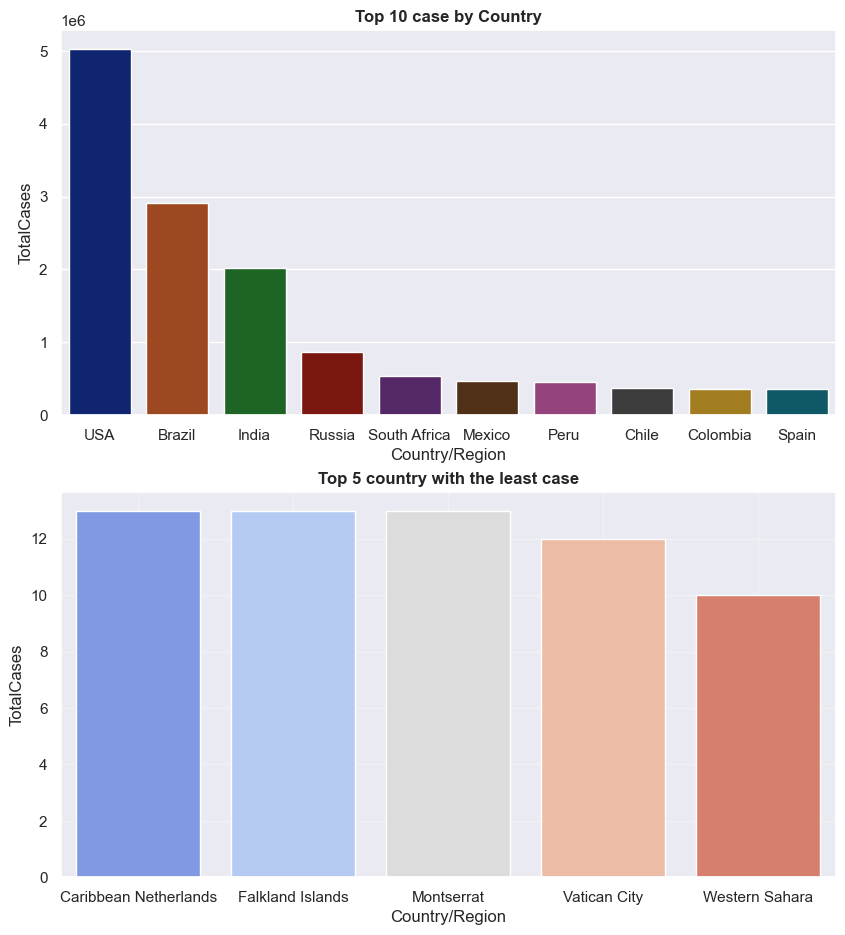

In [26]:
fig, axes = plt.subplots(2, 1, figsize=(10,11))
sns.barplot(data = Top_10_case, x="Country/Region", y= "TotalCases", palette="dark", ax=axes[0])
axes[0].set_title("Top 10 case by Country", fontfamily = "Arial", fontweight = "bold", fontsize = 12)


sns.barplot(data=least_10_case, x="Country/Region", y="TotalCases", palette="coolwarm", ax=axes[1])
axes[1].set_title("Top 5 country with the least case", fontfamily="Arial", fontweight="bold", fontsize=12)
axes[1].grid(alpha=0.3)

#### Top 10 country with the highest Death

In [27]:
Top_10_death_rate = covid.groupby(['Country/Region'])[["TotalDeaths"]].sum().reset_index()
Top_10_death_rate.sort_values(by= "TotalDeaths", ascending= False, inplace= True)
Top_10_death_rate = Top_10_death_rate.head(10).reset_index()
Top_10_death_rate.drop("index", axis = 1, inplace= True)
Top_10_death_rate

,Country/Region,TotalDeaths
0,USA,162804.0
1,Brazil,98644.0
2,Mexico,50517.0
3,UK,46413.0
4,India,41638.0
5,Italy,35187.0
6,France,30312.0
7,Spain,28500.0
8,Peru,20424.0
9,Iran,17976.0


C:\Users\Obiageli\AppData\Local\Temp\ipykernel_15608\2711327178.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Top_10_death_rate, x= "Country/Region", y=  "TotalDeaths",palette= "coolwarm")


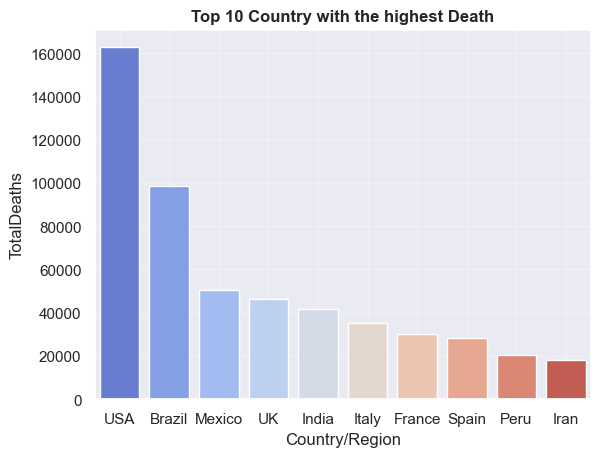

In [28]:
sns.barplot(data=Top_10_death_rate, x= "Country/Region", y=  "TotalDeaths",palette= "coolwarm")
plt.title("Top 10 Country with the highest Death", fontfamily = "Arial", fontweight = "bold", fontsize = 12)
plt.grid(alpha = 0.3)

#### Top 10 Country with the Highest Survival

In [29]:
Top_10_Survived = covid.groupby(['Country/Region'])[["TotalRecovered"]].sum()
Top_10_Survived = covid.groupby(['Country/Region'])[["TotalRecovered"]].sum()
Top_10_Survived.sort_values(by= "TotalRecovered", ascending= False, inplace= True)
Top_10_Survived = Top_10_Survived.head(10).reset_index()


In [30]:
Top_10_Survived

,Country/Region,TotalRecovered
0,USA,2576668.0
1,Brazil,2047660.0
2,India,1377384.0
3,Russia,676357.0
4,South Africa,387316.0
5,Chile,340168.0
6,Peru,310337.0
7,Mexico,308848.0
8,Iran,277463.0
9,Pakistan,256058.0


C:\Users\Obiageli\AppData\Local\Temp\ipykernel_15608\1929009225.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Top_10_Survived, x= "Country/Region", y=  "TotalRecovered",palette= "cubehelix")


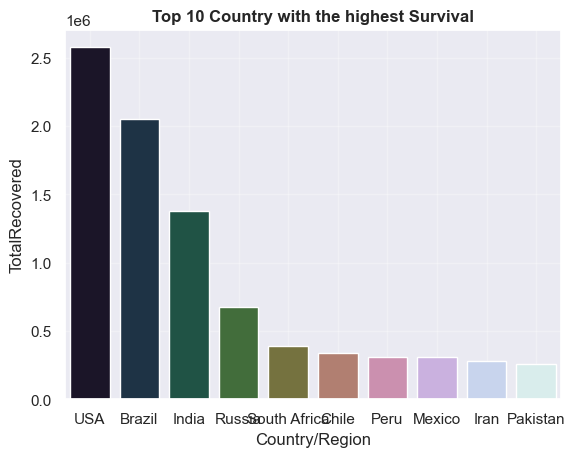

In [31]:
sns.barplot(data=Top_10_Survived, x= "Country/Region", y=  "TotalRecovered",palette= "cubehelix")
plt.title("Top 10 Country with the highest Survival",fontfamily = "Arial", fontweight = "bold", fontsize = 12)
plt.grid(alpha = 0.3)

#### Data Correllation for the case,death and recovered

Text(0.5, 1.0, 'Coreelation Data on Case, Survived and Death')

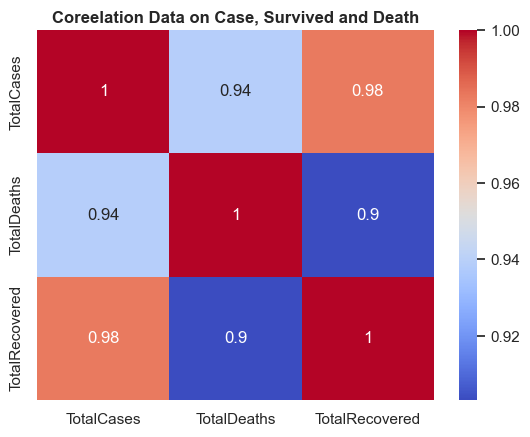

In [32]:

correlation = covid[['TotalCases', 'TotalDeaths', 'TotalRecovered']].corr()
sns.heatmap(correlation, annot= True, cmap="coolwarm")
plt.title("Coreelation Data on Case, Survived and Death", fontfamily = "Arial", fontweight = "bold", fontsize = 12)

#### Total Case and Death Overtime

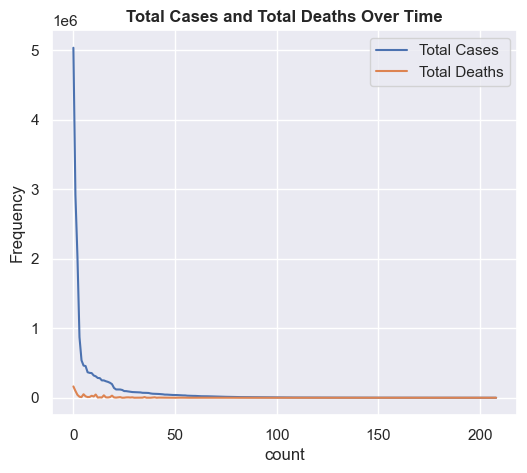

In [33]:
plt.figure(figsize=(6,5))
sns.lineplot(data=covid, x=covid.index, y="TotalCases", label="Total Cases")
sns.lineplot(data=covid, x=covid.index, y="TotalDeaths", label="Total Deaths")
plt.title("Total Cases and Total Deaths Over Time", fontfamily = "Arial", fontweight = "bold", fontsize = 12)
plt.xlabel("count")
plt.ylabel("Frequency")
plt.legend()
plt.show()

#### Total Case and Survived Overtime

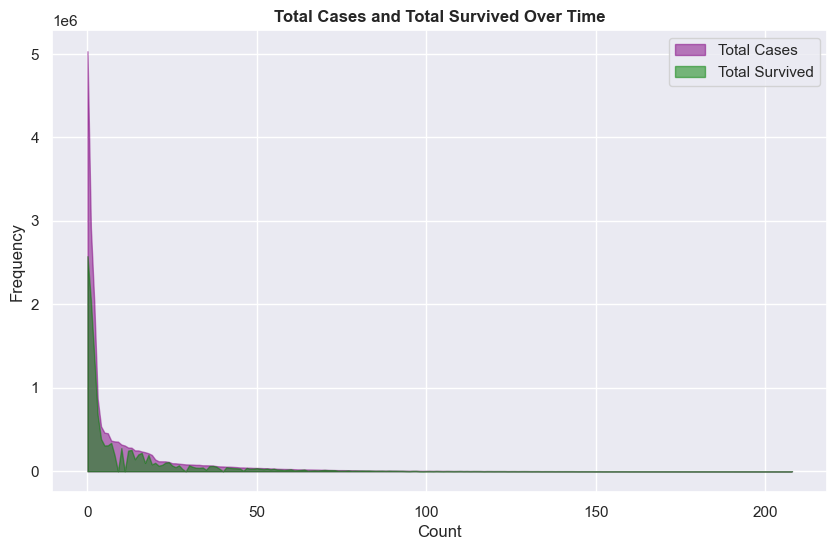

In [34]:
plt.figure(figsize=(10, 6))

plt.fill_between(covid.index, covid['TotalCases'], color="purple", alpha=0.5, label="Total Cases")
plt.fill_between(covid.index, covid['TotalRecovered'], color="green", alpha=0.5, label="Total Survived")

plt.title("Total Cases and Total Survived Over Time",fontfamily = "Arial", fontweight = "bold", fontsize = 12)
plt.xlabel("Count")
plt.ylabel("Frequency")
plt.legend()


plt.show()

#### Population Size and Spread of total case

Text(0, 0.5, 'Total Cases')

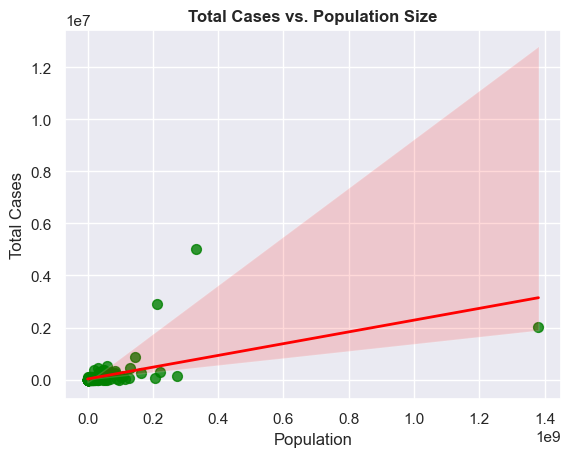

In [35]:
sns.regplot(data=covid, x="Population", y="TotalCases",  scatter_kws={"color": "green", "s": 50},   line_kws={"color": "red", "lw": 2})
plt.title("Total Cases vs. Population Size", fontfamily = "Arial", fontweight = "bold", fontsize = 12)
plt.xlabel("Population")
plt.ylabel("Total Cases")

#### Case Density and Mortality Rate

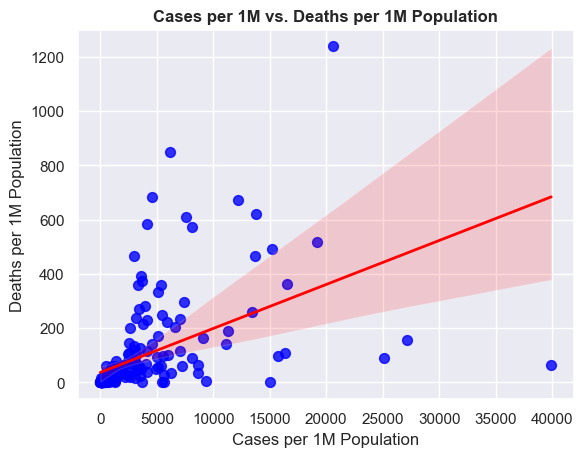

In [36]:
sns.regplot(data=covid, x="Tot Cases/1M pop", y="Deaths/1M pop",  scatter_kws={"color": "blue", "s": 50},   line_kws={"color": "red", "lw": 2})
plt.title("Cases per 1M vs. Deaths per 1M Population", fontfamily = "Arial", fontweight = "bold", fontsize = 12)

plt.xlabel("Cases per 1M Population")
plt.ylabel("Deaths per 1M Population")
plt.show()

#### New event that happen(case, death,survived)

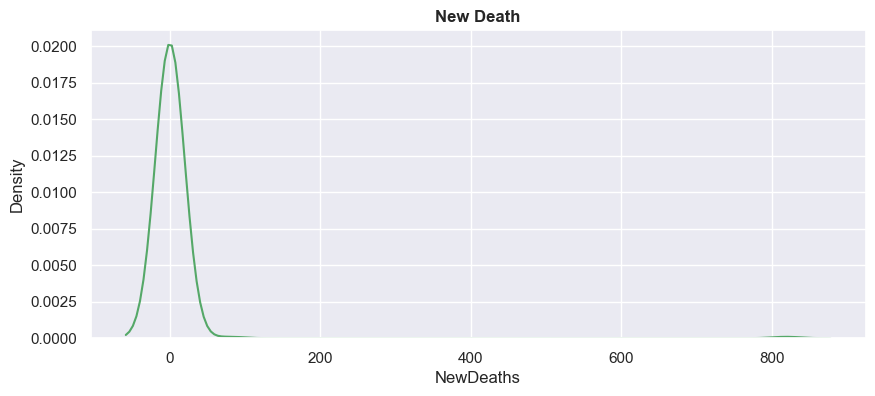

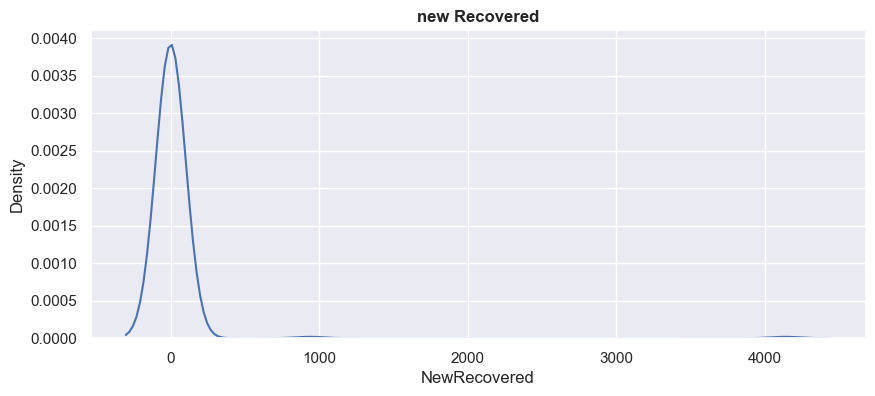

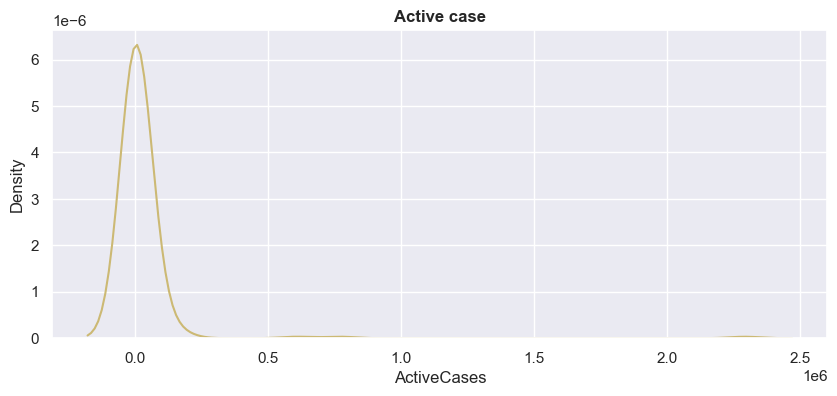

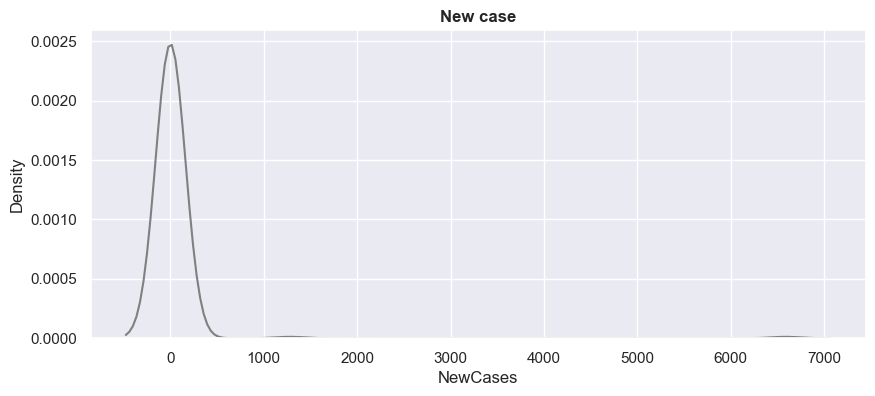

In [37]:

# New Deaths
plt.figure(figsize=(10,4))
ax2 = sns.kdeplot(data=covid, x= 'NewDeaths', color='g')
plt.title("New Death", fontfamily = "Arial", fontweight = "bold", fontsize = 12)
plt.show(ax2)

# Recovered
plt.figure(figsize=(10,4))
ax3 = sns.kdeplot(data=covid, x='NewRecovered', color='b')
plt.title("new Recovered", fontfamily = "Arial", fontweight = "bold", fontsize = 12)
plt.show(ax3)

# Active
plt.figure(figsize=(10,4))
ax4 = sns.kdeplot(data=covid, x='ActiveCases', color='y')
plt.title("Active case", fontfamily = "Arial", fontweight = "bold", fontsize = 12)
plt.show(ax4)

#new case
plt.figure(figsize=(10,4))
ax6 = sns.kdeplot(data=covid, x='NewCases', color='gray')
plt.title("New case", fontfamily = "Arial", fontweight = "bold", fontsize = 12)
plt.show(ax6)


## COVID MODELLING

### Our dependent variable is MORTALITY RATE

In [38]:
covid['HighMortalityRisk'] = covid['TotalDeaths'] > 480

In [39]:
covid['HighMortalityRisk'].unique()

array([ True, False])

In [40]:
list(covid.columns)

['Country/Region',
 'Continent',
 'Population',
 'TotalCases',
 'NewCases',
 'TotalDeaths',
 'NewDeaths',
 'TotalRecovered',
 'NewRecovered',
 'ActiveCases',
 'Serious,Critical',
 'Tot Cases/1M pop',
 'Deaths/1M pop',
 'TotalTests',
 'Tests/1M pop',
 'WHO Region',
 'Daily Growth Rate of Cases (%)',
 'Daily Growth Rate of Deaths (%)',
 'Cases per 1M Population',
 'DeathRate',
 'RecoveryRate',
 'HighMortalityRisk']

In [41]:
x = covid[['Population',  'TotalCases',  'TotalDeaths', 'TotalRecovered']]
y = covid['HighMortalityRisk']

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.5, random_state= 42)

In [43]:
print (y_train.shape)
print (x_test.shape)
print (y_train.shape)
print (y_test.shape)


(104,)
(105, 4)
(104,)
(105,)


## LINEAR REGRESSION

In [44]:
lin_model = LinearRegression()
lin_model.fit(x_train, y_train)

LinearRegression()

In [45]:
y_pred = lin_model.predict(x_test)
y_pred
y_pred.shape

(105,)

In [46]:
y_test = y_test.astype(int)
y_pred = y_pred.astype(int)

In [47]:
print ("Mean Square Error",mean_squared_error(y_pred, y_test) )
print("")
print ("r2 Score", r2_score(y_test, y_pred))
print("")
print("classification_report" ,classification_report(y_test, y_pred))

Mean Square Error 0.44761904761904764

r2 Score -1.343304843304844

classification_report               precision    recall  f1-score   support

           0       0.78      1.00      0.88        78
           1       1.00      0.15      0.26        27
           6       0.00      0.00      0.00         0

    accuracy                           0.78       105
   macro avg       0.59      0.38      0.38       105
weighted avg       0.84      0.78      0.72       105



c:\Users\Obiageli\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Obiageli\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Obiageli\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [48]:
train_predictions = lin_model.predict(x_train)
test_predictions = lin_model.predict(x_test)
print ("x train prediction", train_predictions[0])
print ("x_test prediction", test_predictions[0])

x train prediction 0.4759853281575527
x_test prediction 0.1880386572504473


In [49]:
def new_func():
    y_pred_ = ['Yes' if pred == 1 else 'No' for pred in y_pred]
    single_answer = 'Yes' if y_pred_.count('Yes') > y_pred_.count('No') else 'No'
    print('The level of mortality:', single_answer)

new_func()

The level of mortality: No


> Using linear regression doesn't give the accuracy and mean_square that is useful for the prediction

### LOGISTIC REGRESSION

In [50]:
model = LogisticRegression()
model.fit(x_train, y_train)


c:\Users\Obiageli\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [51]:
y_pred1 = model.predict(x_test)
y_pred1

array([False,  True, False, False,  True, False, False, False,  True,
       False,  True, False, False,  True,  True,  True, False,  True,
        True, False,  True,  True, False,  True, False, False,  True,
       False,  True, False, False,  True, False, False, False, False,
       False, False, False,  True, False, False, False,  True, False,
        True,  True, False,  True, False, False,  True, False,  True,
        True, False, False, False,  True,  True, False, False,  True,
       False,  True,  True, False,  True,  True,  True,  True,  True,
       False,  True, False,  True, False, False,  True, False,  True,
        True, False,  True, False, False,  True,  True, False,  True,
       False,  True, False, False, False, False, False, False,  True,
        True, False,  True,  True, False, False])

In [52]:
mse = mean_squared_error(y_test, y_pred1)
mae = mean_absolute_error(y_test, y_pred1)
r2 = r2_score(y_test, y_pred1)

print("MSE:", mse)
print("MAE:", mae)
print("R² Score:", r2)


MSE: 0.22857142857142856
MAE: 0.22857142857142856
R² Score: -0.196581196581197


In [53]:
y_pred1 = (y_pred1.astype(int)  )
print("Classification Report:")
print(classification_report(y_test, y_pred1))


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.72      0.82        78
           1       0.53      0.93      0.68        27

    accuracy                           0.77       105
   macro avg       0.75      0.82      0.75       105
weighted avg       0.85      0.77      0.79       105



In [54]:
print("Model score:", model.score(x_test, y_test))
print( "accuracy", accuracy_score(y_pred1, y_test))

Model score: 0.7714285714285715
accuracy 0.7714285714285715


In [55]:
y_pred_labels1 = ['Yes' if pred == True else 'No' for pred in y_pred1]
single_answer = 'Yes' if y_pred_labels1.count('Yes') > y_pred_labels1.count('No') else 'No'
print('The level of mortality:', single_answer)


The level of mortality: No


In [56]:
confusion_mat = confusion_matrix(y_pred1, y_test)
confusion_mat

array([[56,  2],
       [22, 25]], dtype=int64)

<Axes: >

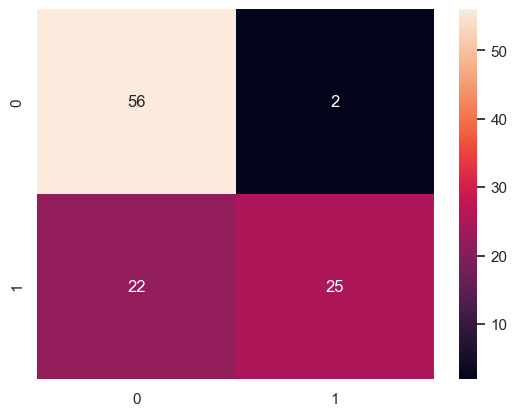

In [57]:
sns.heatmap(confusion_mat, annot=True)

In [58]:
y_pred_labels1.count('No')

58

Text(0, 0.5, 'Count')

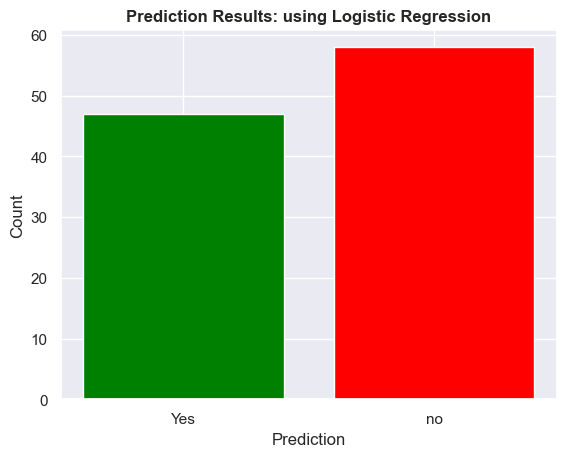

In [59]:
yes_count = y_pred_labels1.count('Yes')
no_count = y_pred_labels1.count('No')
plt.bar(['Yes', 'no'], [yes_count, no_count], color=['green', 'red'])
plt.title('Prediction Results: using Logistic Regression', fontfamily = "Arial", fontweight = "bold", fontsize = 12)
plt.xlabel('Prediction')
plt.ylabel('Count')


**USING DECISION TREE CLASSIFIER**

In [60]:
decision1 = DecisionTreeClassifier()
decision1.fit(x_train, y_train)

DecisionTreeClassifier()

In [61]:
y_pred2= decision1.predict(x_test)
mse = mean_squared_error(y_test, y_pred2)
print(f"Regression Model Mean Squared Error: {mse}")
print ("accuracy", accuracy_score(y_test, y_pred2))

Regression Model Mean Squared Error: 0.01904761904761905
accuracy 0.9809523809523809


In [62]:
y_pred_labels2 = ['Yes' if pred == True else 'No' for pred in y_pred2]
single_answer2 = 'Yes' if y_pred_labels2.count('Yes') > y_pred_labels2.count('No') else 'No'
print('The level of mortality:', single_answer)


The level of mortality: No


(-1.0999992043637574,
 1.0999983239196462,
 -1.0999956671932352,
 1.0999997936758683)

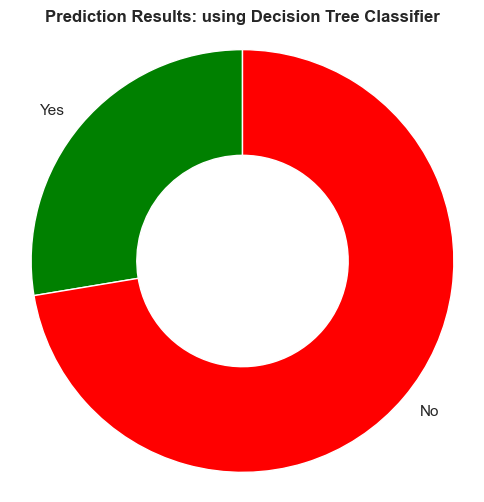

In [63]:
yes_count = y_pred_labels2.count('Yes')
no_count = y_pred_labels2.count('No')
labels = ['Yes', 'No']
sizes = [yes_count, no_count]
colors = ['green', 'red']
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(sizes, labels=labels, colors=colors,  startangle=90, wedgeprops=dict(width=0.5))
plt.title('Prediction Results: using Decision Tree Classifier', fontfamily = "Arial", fontweight = "bold", fontsize = 12)
ax.axis('equal')


**USING RANDOM FOREST CLASSIFIER**

In [64]:
Ran_model = RandomForestClassifier(n_estimators=100, random_state=42)  
Ran_model.fit(x_train, y_train)
y_pred3 = Ran_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred3)

accuracy

0.9714285714285714

In [65]:

report = classification_report(y_test, y_pred3)
print (report)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        78
           1       0.90      1.00      0.95        27

    accuracy                           0.97       105
   macro avg       0.95      0.98      0.96       105
weighted avg       0.97      0.97      0.97       105



In [66]:
y_pred_labels3 = ['Yes' if pred == True else 'No' for pred in y_pred3]
single_answer = 'Yes' if y_pred_labels3.count('Yes') > y_pred_labels3.count('No') else 'No'
print('The level of mortality:', single_answer)


The level of mortality: No


In [67]:
y_pred_labels3.count('Yes')

30

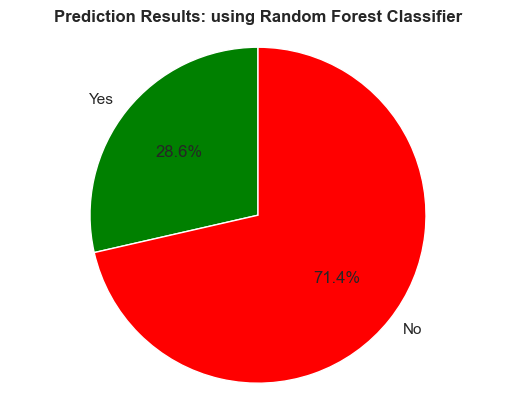

In [68]:
yes_count = y_pred_labels3.count('Yes')
no_count = y_pred_labels3.count('No')
labels = ['Yes', 'No']
sizes = [yes_count, no_count]
colors = ['green', 'red']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal') 
plt.title('Prediction Results: using Random Forest Classifier', fontfamily = "Arial", fontweight = "bold", fontsize = 12)
plt.show()


## SURVIVING RATE

**LOGISTIC REGRESSION**

In [69]:
covid['SurvivalRate'] = ((covid['TotalRecovered'] / covid['TotalCases']) * 100) > 50
x = covid[['Population',  'TotalCases',  'TotalDeaths', 'TotalRecovered']]
Y = covid['SurvivalRate']

In [70]:
covid['SurvivalRate'].unique()

array([ True, False])

In [71]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x, Y, test_size= 0.5, random_state= 42)
model.fit(x1_train, y1_train)
y4_pred = model.predict(x1_test)
y4_pred

print(f"Regression Model Mean Squared Error: {mse}")
print ("accuracy", accuracy_score(y1_test, y4_pred))
print ("accuracy", classification_report(y4_pred, y1_test))

Regression Model Mean Squared Error: 0.01904761904761905
accuracy 1.0
accuracy               precision    recall  f1-score   support

       False       1.00      1.00      1.00        23
        True       1.00      1.00      1.00        82

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105



In [72]:
y_pred_labels4 = ['Yes' if pred == True else 'No' for pred in y4_pred]
single_answer = 'Yes' if y_pred_labels4.count('Yes') > y_pred_labels4.count('No') else 'No'
print('The level of Survived:', single_answer)


The level of Survived: Yes


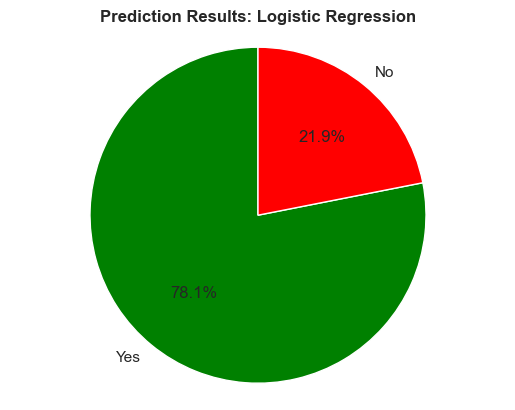

In [73]:
yes_count = y_pred_labels4.count('Yes')
no_count = y_pred_labels4.count('No')
labels = ['Yes', 'No']
sizes = [yes_count, no_count]
colors = ['green', 'red']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal') 
plt.title('Prediction Results: Logistic Regression', fontfamily = "Arial", fontweight = "bold", fontsize = 12)
plt.show()

**USING RANDOM FOREST**

In [74]:
Ran_model.fit(x1_train, y1_train)
y5_pred = Ran_model.predict(x1_test)
y5_pred
print ("accuracy", accuracy_score(y5_pred, y1_test))


accuracy 0.8666666666666667


In [75]:
y_pred_labels5 = ['Yes' if pred == True else "No" for pred in y5_pred]
Answer = 'Yes' if y_pred_labels5.count("Yes") > y_pred_labels5.count("No") else "No" 
print ('Prediction Result:', Answer)

Prediction Result: Yes


Text(0, 0.5, 'Prediction')

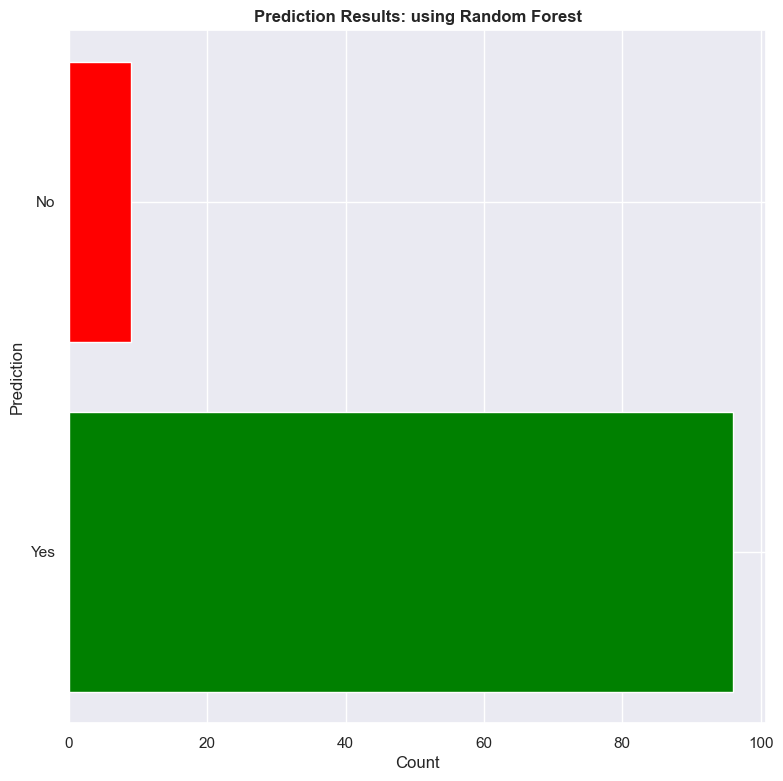

In [76]:
No_count1 = y_pred_labels5.count("No")
Yes_count1 = y_pred_labels5.count("Yes")
plt.figure(figsize=(9, 9))
plt.barh(["Yes","No"], [Yes_count1, No_count1], color = ["Green", "Red"])
plt.title('Prediction Results: using Random Forest', fontfamily = "Arial", fontweight = "bold", fontsize = 12)
plt.xlabel('Count')
plt.ylabel('Prediction')
